# **Mestrado Profisional PROFICAM - ITV**

## **Introdução a Visão Computacional** 

### Aula 02 - **Homework 01** Exemplos de processamento de imagens: thresholding, filtragem, contagem de objetos, histogramas, etc.

Documentação extra do OpenCV pode ser visualizada em: https://docs.opencv.org/master/d6/d00/tutorial_py_root.html

Preparacao do ambiente para executar as atividades:

In [1]:
# import para melhorar a compatibilidade entre python2 e python3 
    
from __future__ import print_function

In [2]:
# Imports necessários

from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import imutils

import cv2
# from google.colab.patches import cv2_imshow
# cv2_imshow pode ser usado tambem para mostrar imagens ao invez do matplotlib
# so funciona no google colab!
%matplotlib inline

In [3]:
print("OpenCV version:", cv2.__version__)

OpenCV version: 4.1.2


Inicialmente precisamos clonar o repositorio com as imagens que vamos usar para os experimentos

In [4]:
# Baixar os arquivos necessários para a aula
!rm -rf intro_cv_proficam
!git clone https://github.com/h3ct0r/intro_cv_proficam
!cp -r intro_cv_proficam/img img

Cloning into 'intro_cv_proficam'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 69 (delta 9), reused 65 (delta 8), pack-reused 0
Unpacking objects: 100% (69/69), done.


## Desafio 1: Contar elementos na mesa

O desafio seria usar as técnicas aprendidas na aula para contar o numero de bolas automáticamente.

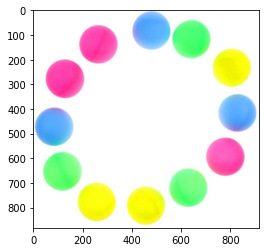

In [37]:
img = cv2.imread('img/color_balls.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

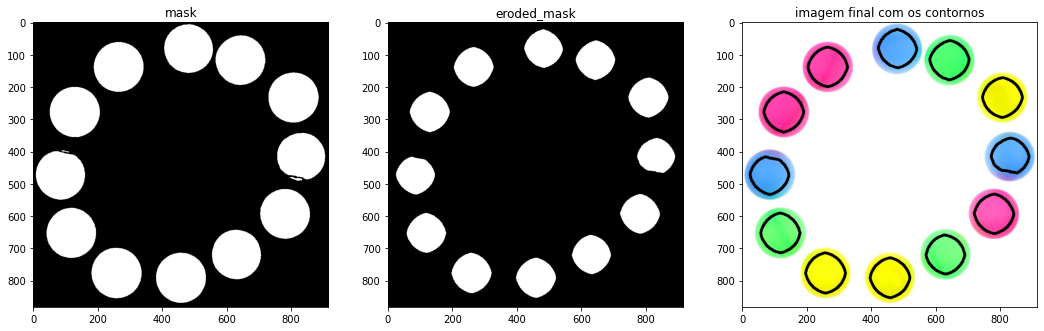

In [44]:
### Colocar o seu codigo aqui
### Dica, segmentar via espaco de cores HSV!

imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

mask = cv2.inRange(imgHSV, (0, 80, 0), (172, 255, 255))

kernel = np.ones((5, 5),np.uint8)
eroded_mask = cv2.erode(mask, kernel, iterations=7)

contours, hierarchy = cv2.findContours(eroded_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[-2:]

# Draw contours:
img_output = img.copy()
cv2.drawContours(img_output, contours, -1, (0, 0, 0), 7)

#cv2.imshow('target', img)

plt.figure(figsize=(18, 18)) # LARGura e ALTura da imagem total em polegadas
plt.subplot2grid((1,3),(0,0)) #(linhas, colunas) do grid (l,c) do elemento
plt.title('mask')
plt.imshow(mask, cmap='gray')

plt.subplot2grid((1,3),(0,1)) #(linhas, colunas) do grid (l,c) do elemento
plt.title('eroded_mask')
plt.imshow(eroded_mask, cmap='gray')

plt.subplot2grid((1,3),(0,2)) #(linhas, colunas) do grid (l,c) do elemento
plt.title('imagem final com os contornos')
plt.imshow(img_output, cmap='gray')

## Desafio 2: Contar dados

O desafio seria extrair o numero total de bolinhas de *cada dado*.
A saida do algoritmo seria: 

`Dado esquerda: X, Dado direita: Y`, onde X e Y são o numero de bolas para cada dado respectivamente.

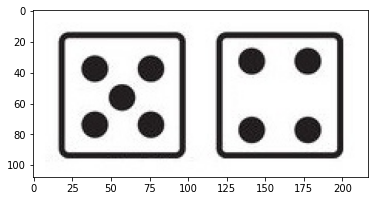

In [ ]:
imagem = cv2.imread('img/dados5.jpg')
img = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(img)

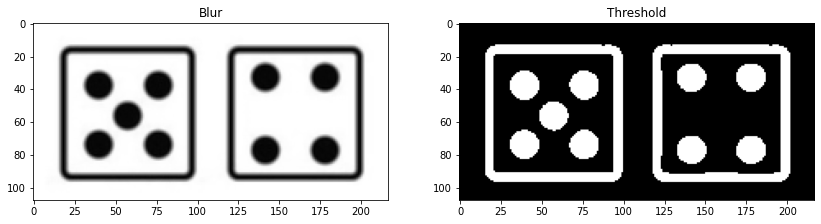

In [ ]:
### Colocar o seu codigo aqui
### Dica, pode usar thresolding
### pro-tip: pode dividir a contagem por setores da imagem! esquerda e direita

#img = img[::2,::2] # reduz imagem pela metade se precisar
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.blur(gray, (3, 3)) # aplica blur
bin = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 5)

plt.figure(figsize=(14, 9)) # LARGura e ALTura da imagem total em polegadas
plt.subplot2grid((2,2),(0,0)) #(linhas, colunas) do grid (l,c) do elemento
plt.title('Blur')
plt.imshow(blur, cmap='gray')

plt.subplot2grid((2,2),(0,1)) #(linhas, colunas) do grid (l,c) do elemento
plt.title('Threshold')
plt.imshow(bin, cmap='gray')

DadoA: 4 DadoB: 5


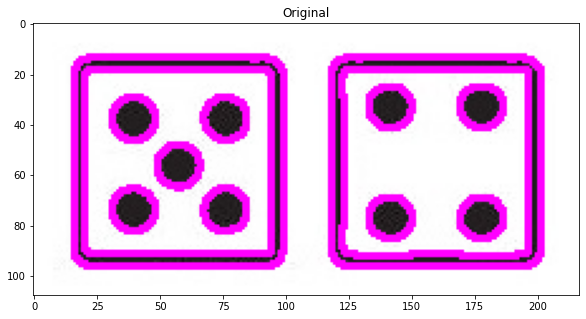

In [ ]:
### Colocar o seu codigo aqui
### Dica: contar a imagem pelos contornos e pelo lado! (esqueda ou direita?)

cnts, hierarchy = cv2.findContours(bin.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2:]

dadoA = 0
dadoB = 0
contandoDadoA = 1

for obj in cnts:
    per = cv2.arcLength(obj, True)
    if(per<100):#entao é a bolinha pequena do dado
        if(contandoDadoA==1):
            dadoA+=1
        else:
            dadoB+=1
    else:
        if(dadoA>0):
            contandoDadoA=0

s = 'DadoA: '+str(dadoA)+' DadoB: '+str(dadoB)

print(s)

imgC2 = img.copy()
cv2.drawContours(imgC2, cnts, -1, (255, 0, 255), 2)
plt.figure(figsize=(14, 5)) # LARGura e ALTura da imagem total em polegadas
plt.subplot2grid((1,1),(0,0)) #(linhas, colunas) do grid (l,c) do elemento
plt.title('Original')
plt.imshow(imgC2)

## Desafio 3: Estimar vagas ocupadas ou desocupadas num estacionamento

Neste desafio vamos fazer a contagem de vagas vazias num estacionamento, nessa primeira parte vamos fazer a visualização das differentes vagas ocupadas e desocupadas. 

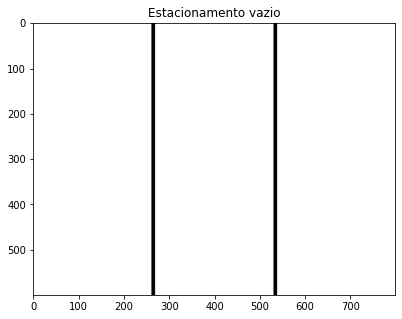

In [ ]:
imagem = cv2.imread('img/estaciona_vazio.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(14, 5))
plt.title('Estacionamento vazio')
plt.imshow(imagem)

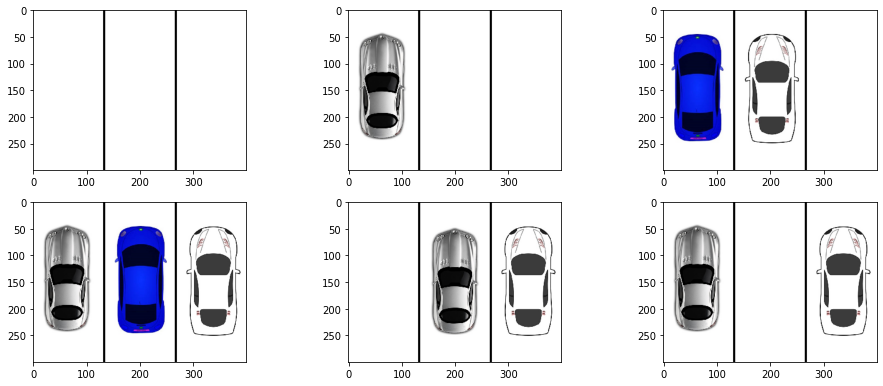

In [ ]:
def open_image(i):
    """
    Abre uma imagem, converte ela para RGB e reduz na metade do tamanho
    Retorna a matriz da imagem reduzida
    """
        
    i = cv2.imread(i)
    i = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)  # converte BGR para RGB
    i = i[::2,::2]  # reduz image pela metade
    return i

img_paths = ['img/estaciona_vazio.jpg', 
         'img/estaciona1.jpg', 
         'img/estaciona2.jpg', 
         'img/estaciona3.jpg', 
         'img/estaciona4.jpg', 
         'img/estaciona5.jpg']

# itera na lista de imagens e carrega elas numa lista
img_l = []
for f in img_paths:
    img_l.append(open_image(f))
    
# plot images
plt.figure(figsize=(16, 10))  # LARGura e ALTura da imagem total em polegadas
for i in range(2):
    for j in range(3):
        plt.subplot2grid((3,3),(i, j))  # define a posicao da imagem no grid 3x3
        image = img_l[(i * 3) + j]  # obtem a imagem na posicao correta
        plt.imshow(image, cmap='gray')  # plot a imagem na posicao correta

### Podemos usar a diferença entre imagens para estimar quais vagas estão ocupadas

A diferença entre uma imagem A e uma imagem B nos mostra quais areas entre as duas imagens são diferentes. Como visualizado na aula, os operadores de numpy ao carregar as imagens como matrices podemos usar operadores matemáticos diretamente.

Na imagem da diferença, onde ficaram só as partes "diferentes" entre as duas imagens, da pra estimar um histograma de cada coluna na imagem!

Dica: Calcular as diferencas entre as imagens e estimar a soma dos valores de cada coluna na imagem e plotar eles

In [ ]:
def estimate_vertical_differences(img1, img2):
    """
    Estimar as diferencas entre duas imagens em escala de cinzas
    Retorna um vector com a soma dos valores para cada coluna e a imagem das diferencas
    """
    
    iA = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)  # Converte para imagem em tons de cinza
    iB = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY) 
    
    img_difference = iA - iB  # realiza a subtracao
    column_pixel_sum = [sum(x) for x in zip(*img_difference)]  # soma os valores dos pixels das colunas
    
    # retorna a soma dos valores de cada coluna, e a imagem das diferencas
    return column_pixel_sum, img_difference

In [ ]:
def estimate_occupancy(column_intensity, threshold=5000):
    """
    Estimar a ocupacao das vagas dado o vector de intensidade por coluna
    Retorna um vector com true ou false dependendo se a vaga esta ocupada ou nao
    """
    
    # sabendo que sao 3 vagas, e o nosso vetor e de 400 pixels podemos segmentar os pixels
    # horizontais por vaga
    # limites na esquerda e direita para cada vaga
    limits_per_vaga = [
        (10, 120),   # vaga 1
        (140, 250),  # vaga 2
        (270, 390)   # vaga 3 
    ]
        
    vaga_occupancy = []
    for limit in limits_per_vaga:
        inferior_limit, superior_limit = limit
        sum_columns_vaga = sum(1 for x in column_intensity[inferior_limit:superior_limit] if x>threshold)
        if sum_columns_vaga > 30:
            vaga_occupancy.append(True)
        else:
            vaga_occupancy.append(False)
        
    return vaga_occupancy

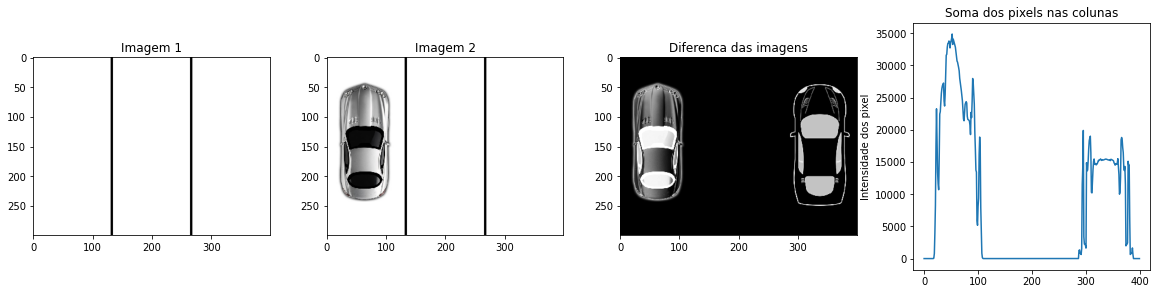

In [ ]:
# mudar img_l[1] para variar os outros cenarios dos estacionamentos
img_vazio = img_l[0]
col_sum, diff_img = estimate_vertical_differences(img_vazio, img_l[5])
occupancy_per_vaga = estimate_occupancy(col_sum)

# faz o plot das imagens
plt.figure(figsize=(16,4))

plt.subplot2grid((1,4),(0,0))
plt.title('Imagem 1')
plt.imshow(img_l[0], cmap='gray')

plt.subplot2grid((1,4),(0,1))
plt.title('Imagem 2')
plt.imshow(img_l[1], cmap='gray')

plt.subplot2grid((1,4),(0,2))
plt.title('Diferenca das imagens')
plt.imshow(diff_img, cmap='gray')

plt.subplot2grid((1,4),(0,3))
plt.title("Soma dos pixels nas colunas")
plt.ylabel("Intensidade dos pixel")
plt.plot(range(len(col_sum)), col_sum)
plt.tight_layout(pad=0.4)

plt.show()